In [10]:
import numpy as np
import pydicom as dicom
import pandas as pd
import matplotlib.pyplot as plt
import SimpleITK as sitk
import six
import cv2

from myshow import myshow
from radiomics import featureextractor, getTestCase

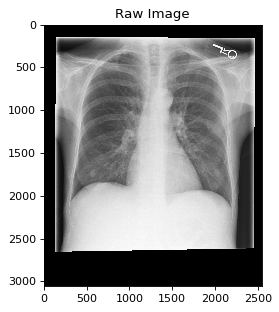

In [11]:
# specify your image path
image_path = '02aa804e-bde0afdd-112c0b34-7bc16630-4e384014.dcm'
ds = dicom.dcmread(image_path)
img = sitk.GetImageFromArray(ds.pixel_array)
img_255 = sitk.Cast(sitk.RescaleIntensity(img), sitk.sitkUInt8)
myshow(img_255, title="Raw Image")

In [12]:
ds.pixel_array.shape

(3056, 2544)

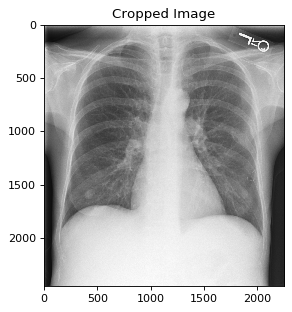

In [13]:
crop = ds.pixel_array[150:2600,150:2400]
img_crop = sitk.GetImageFromArray(crop)
img_crop_255 = sitk.Cast(sitk.RescaleIntensity(img_crop), sitk.sitkUInt8)
myshow(img_crop, title="Cropped Image")

## Segmentation 1: Thresholding
### Basic Thresholding

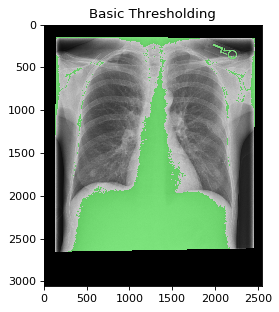

In [14]:
seg_basic = img_255>200
myshow(sitk.LabelOverlay(img_255, seg_basic), "Basic Thresholding")

In [15]:
extractor = featureextractor.RadiomicsFeatureExtractor('params.yaml')
result = extractor.execute(img_255, seg_basic)

In [7]:
feature_names = ['firstorder', 'shape2D', 'glcm', 'glrlm', 'glszm', 'gldm', 'ngtdm']
data = {}
for key, value in six.iteritems(result):
    for feature in feature_names:
        if feature in key:
            data[key[9:]] = float(value)

In [35]:
data

{'shape2D_Elongation': 0.740729161881075,
 'shape2D_MajorAxisLength': 2593.0826088675417,
 'shape2D_MaximumDiameter': 3417.929343915699,
 'shape2D_MeshSurface': 1715155.5,
 'shape2D_MinorAxisLength': 1920.7719075548457,
 'shape2D_Perimeter': 113049.7624567639,
 'shape2D_PerimeterSurfaceRatio': 0.06591225253731449,
 'shape2D_PixelSurface': 1717753.0,
 'shape2D_Sphericity': 0.04106643735380177,
 'firstorder_10Percentile': 206.0,
 'firstorder_90Percentile': 244.0,
 'firstorder_Energy': 88567516054.0,
 'firstorder_Entropy': 1.0225776572392118,
 'firstorder_InterquartileRange': 23.0,
 'firstorder_Kurtosis': 1.8970705895452395,
 'firstorder_Maximum': 255.0,
 'firstorder_MeanAbsoluteDeviation': 11.814788122217747,
 'firstorder_Mean': 226.6537587185119,
 'firstorder_Median': 228.0,
 'firstorder_Minimum': 201.0,
 'firstorder_Range': 54.0,
 'firstorder_RobustMeanAbsoluteDeviation': 9.591947638525737,
 'firstorder_RootMeanSquared': 227.0684913553196,
 'firstorder_Skewness': -0.2499253473355245,
 

### Binary Thresholding

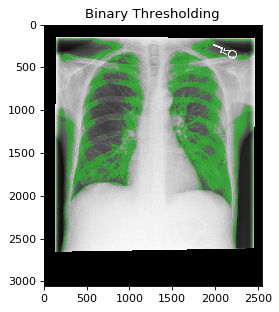

In [37]:
seg_binary = sitk.BinaryThreshold(img_255, lowerThreshold=100, upperThreshold=400, insideValue=1, outsideValue=0)
myshow(sitk.LabelOverlay(img_255, seg_binary), "Binary Thresholding")

### Otsu Thresholding

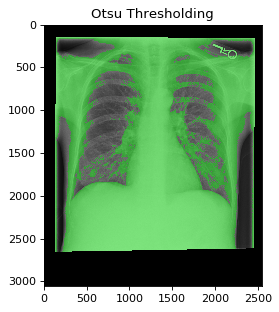

In [38]:
otsu_filter = sitk.OtsuThresholdImageFilter()
otsu_filter.SetInsideValue(0)
otsu_filter.SetOutsideValue(1)
seg_otsu = otsu_filter.Execute(img)
myshow(sitk.LabelOverlay(img_255, seg_otsu), "Otsu Thresholding")

# Part 2: Orientation issues

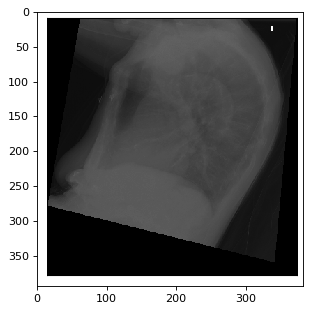

In [5]:
p = cv2.imread('png_img/d78ab032-f4244f9b-f50a01e8-a8cc81f4-64d74a8c.png', 0)
img = sitk.GetImageFromArray(p)
img_255 = sitk.Cast(sitk.RescaleIntensity(img), sitk.sitkUInt8)
myshow(img_255)

## Segmentation with Basic Thresholding

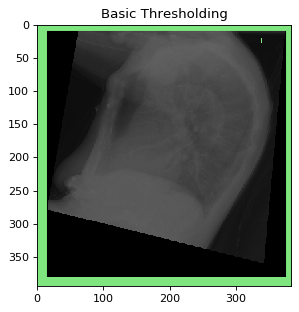

In [8]:
seg_basic = img_255>200
seg = sitk.BinaryThreshold(img_255, lowerThreshold=100, upperThreshold=400, insideValue=1, outsideValue=0)
myshow(sitk.LabelOverlay(img_255, seg_basic), "Basic Thresholding")

## Segmentation with Otsu Thresholding

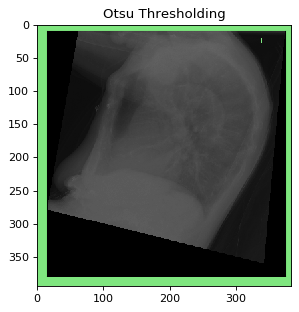

In [9]:
otsu_filter = sitk.OtsuThresholdImageFilter()
otsu_filter.SetInsideValue(0)
otsu_filter.SetOutsideValue(1)
seg_otsu = otsu_filter.Execute(img_255)
myshow(sitk.LabelOverlay(img_255, seg_otsu), "Otsu Thresholding")